In [ ]:
#I'm using the Titanic Dataset to perform the following analysis.

In [581]:
# Import all libraries needed for the tutorial
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
# Enable inline plotting
%matplotlib inline

In [582]:
#print out the first few lines for each csv file 

In [583]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')
print titanic_train.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [584]:
#To make the Pclass to be more descriptive, change the indicating number into corresponding Class label.

In [585]:
new_Pclass = pd.Categorical(titanic_train['Pclass'],ordered = True)
new_Pclass = new_Pclass.rename_categories(['Class1','Class2','Class3'])
new_Pclass.describe()

,counts,freqs
categories,,
Class1,216,0.242424
Class2,184,0.206510
Class3,491,0.551066


In [586]:
titanic_train['Pclass'] = new_Pclass

In [587]:
#In order to make it easier to count the number of people for each cabin, use the first letter of each cabin number
#to indicate the cabin

In [588]:
titanic_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [589]:
char_cabin = titanic_train['Cabin'].astype(str)
new_cabin = np.array([cabin[0] for cabin in char_cabin])
new_cabin = pd.Categorical(new_cabin)
new_cabin.describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [590]:
titanic_train['Cabin'] = new_cabin

In [591]:
#check out the data type for each remaining variable

In [592]:
titanic_train.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin          category
Embarked         object
dtype: object

In [593]:
#check out the statistical information for every variable in each csv file

In [594]:
print(titanic_train.describe())

       PassengerId    Survived         Age       SibSp       Parch        Fare
count   891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000    0.383838   29.699118    0.523008    0.381594   32.204208
std     257.353842    0.486592   14.526497    1.102743    0.806057   49.693429
min       1.000000    0.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    0.000000         NaN    0.000000    0.000000    7.910400
50%     446.000000    0.000000         NaN    0.000000    0.000000   14.454200
75%     668.500000    1.000000         NaN    1.000000    0.000000   31.000000
max     891.000000    1.000000   80.000000    8.000000    6.000000  512.329200


In [595]:
print(titanic_test.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000         NaN    0.000000    0.000000         NaN
50%    1100.500000    3.000000         NaN    0.000000    0.000000         NaN
75%    1204.750000    3.000000         NaN    1.000000    0.000000         NaN
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


In [596]:
#notice that variables with type 'object' did not appear above, so we extract those variables with data type of 
#'object' and print out the relative information about each variable.

In [597]:
categorical = titanic_train.dtypes[titanic_train.dtypes == 'object'].index
print (categorical)

titanic_train[categorical].describe()

Index([u'Name', u'Sex', u'Ticket', u'Embarked'], dtype='object')


,Name,Sex,Ticket,Embarked
count,891,891,891,889
unique,891,2,681,3
top,"Graham, Mr. George Edward",male,CA. 2343,S
freq,1,577,7,644


In [598]:
#Notice that in the train.csv, there are lots of missing values for the column 'Age', let's see how many people we
#don't know about their ages

In [599]:
titanic_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%             NaN
50%             NaN
75%             NaN
max       80.000000
Name: Age, dtype: float64

In [600]:
missing = np.where(titanic_train['Age'].isnull() == True)
missing

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888]),)

In [601]:
len(missing[0])

177

In [602]:
#we are missing totally 177 person's age, now let's visualize the distribution of all the ages we have

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12fe854d0>]], dtype=object)

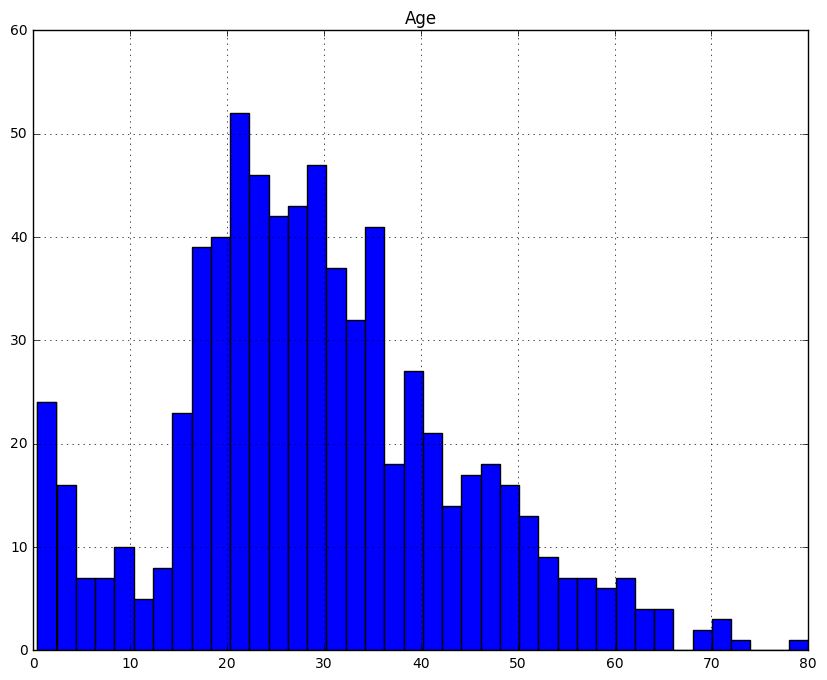

In [603]:
titanic_train.hist(column='Age',
                  figsize=(10,8),
                  bins=40)

In [604]:
#In order to make the plot to be more comprehensive over all, we choose to use the median of ages to fill out the
#remaining missing values for column 'Age'.

In [605]:
titanic_train['Age'].median()

28.0

In [606]:
titanic_train['Age'] = titanic_train['Age'].fillna(titanic_train['Age'].median())

In [607]:
titanic_train['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [608]:
#Now,let's show the distribution of ages again

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x130222790>]], dtype=object)

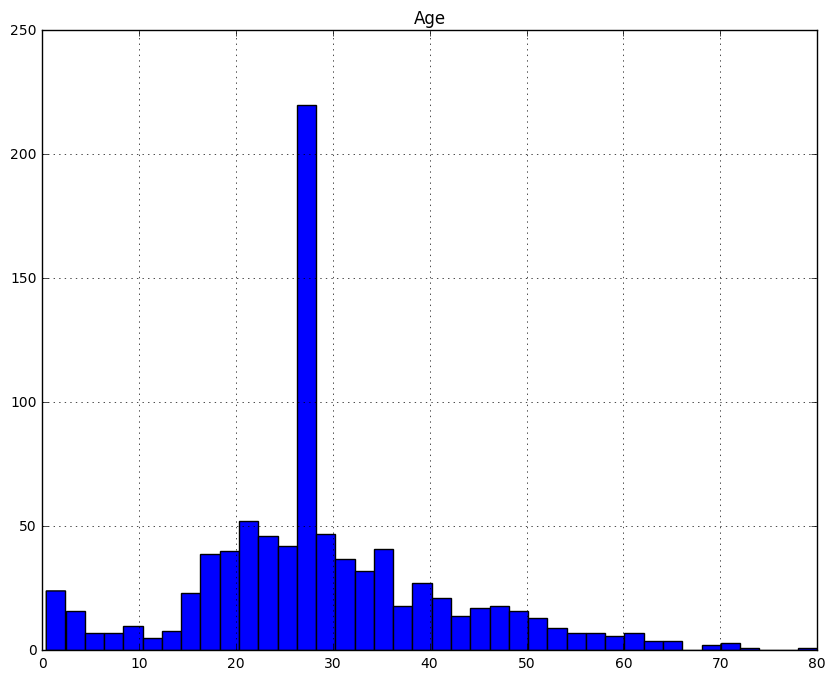

In [609]:
titanic_train.hist(column='Age',
                  figsize=(10,8),
                  bins=40)

In [610]:
#Next, I want to explore the impact of age to the person's survival rate

In [611]:
Sex_Survived_Grouping = titanic_train.groupby(['Sex','Survived']).mean()

In [612]:
Sex_Survived_Grouping

PassengerId        Age     SibSp     Parch       Fare
Sex    Survived                                                       
female 0          434.851852  25.666667  1.209877  1.037037  23.024385
       1          429.699571  28.716738  0.515021  0.515021  51.938573
male   0          449.121795  30.783120  0.440171  0.207265  21.960993
       1          475.724771  27.382294  0.385321  0.357798  40.821484

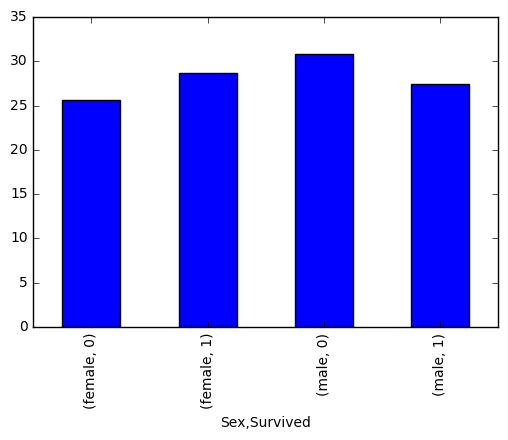

In [613]:
Sex_Survived_Grouping['Age'].plot.bar()

In [614]:
#From the above histogram, it's hard to say age has any impact on the survival rate. However, it's occur to me that 
#children should have the most chances to survive, so I narrow down the age range trying to verify my idea.

          PassengerId  Survived        Age     SibSp     Parch       Fare
Age                                                                      
(0, 10]    430.843750  0.593750   4.268281  1.843750  1.421875  30.434439
(10, 20]   447.660870  0.382609  17.317391  0.591304  0.391304  29.529531
(20, 30]   431.683047  0.334152  26.544226  0.427518  0.213759  25.632952
(30, 40]   468.690323  0.445161  35.051613  0.374194  0.393548  42.496100
(40, 50]   483.500000  0.383721  45.372093  0.372093  0.430233  41.163181
(50, 60]   449.809524  0.404762  54.892857  0.309524  0.309524  44.774802
(60, 70]   430.882353  0.235294  63.882353  0.176471  0.352941  45.910782
(70, 80]   438.200000  0.200000  73.300000  0.000000  0.000000  25.936680


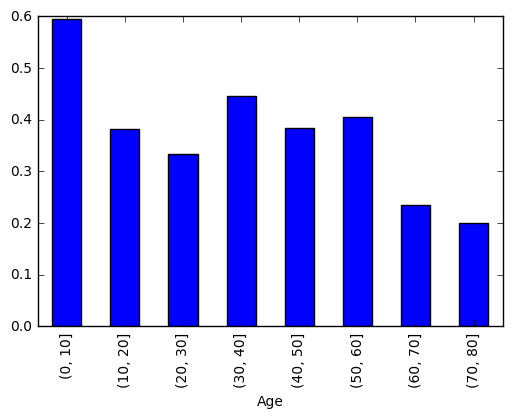

In [615]:
group_by_age = pd.cut(titanic_train['Age'], np.arange(0,90,10))
age_grouping = titanic_train.groupby(group_by_age).mean()
print age_grouping
age_grouping['Survived'].plot.bar()

In [616]:
#Now we can see that children under 10 years-old have the most chances to survive, which make sense in this case.

In [617]:
#Besides the impact of age, I also want to explore the impact of fare price on people's survival rate.

In [618]:
#First, Take a look at the detailed statistical information for the variable 'Fare'.

In [619]:
titanic_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [620]:
#Next, Using the box plot to show the distribution of each fair price

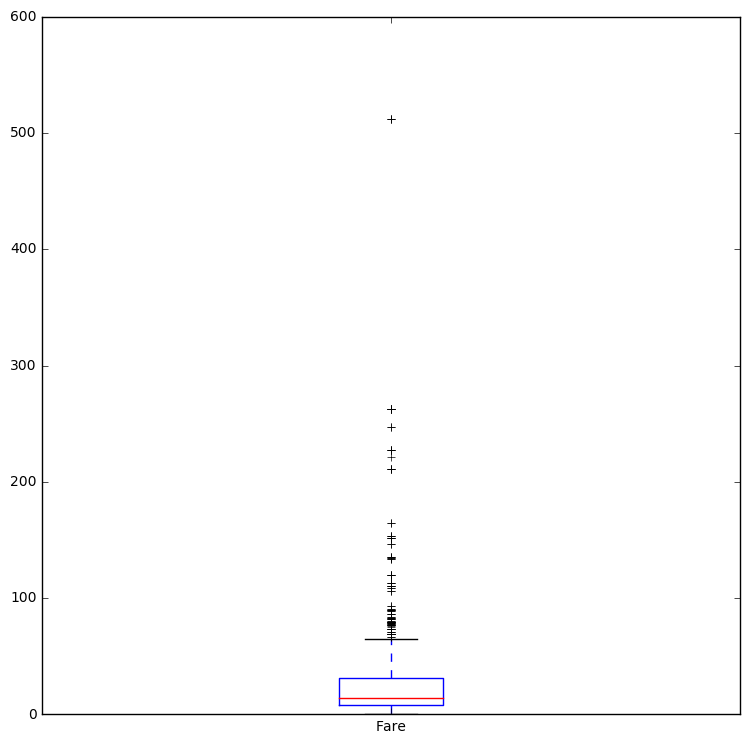

In [621]:
titanic_train['Fare'].plot(kind='box', figsize=(9,9))

In [622]:
#From the above plot we can see that with the majority of fare price are cheap, there are still much more 
#tickets that are very expensive.

In [623]:
#Next, to see how does different fare changes people's survival rate, find out the information of people who paid 
#the least and who paid the most separately.

In [624]:
index = np.where(titanic_train['Fare'] == min(titanic_train['Fare']))
print index
titanic_train.iloc[index]

(array([179, 263, 271, 277, 302, 413, 466, 481, 597, 633, 674, 732, 806,
       815, 822]),)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,Class3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,n,S
263,264,0,Class1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B,S
271,272,1,Class3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,n,S
277,278,0,Class2,"Parkes, Mr. Francis ""Frank""",male,28.0,0,0,239853,0.0,n,S
302,303,0,Class3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,n,S
413,414,0,Class2,"Cunningham, Mr. Alfred Fleming",male,28.0,0,0,239853,0.0,n,S
466,467,0,Class2,"Campbell, Mr. William",male,28.0,0,0,239853,0.0,n,S
481,482,0,Class2,"Frost, Mr. Anthony Wood ""Archie""",male,28.0,0,0,239854,0.0,n,S
597,598,0,Class3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,n,S
633,634,0,Class1,"Parr, Mr. William Henry Marsh",male,28.0,0,0,112052,0.0,n,S


In [625]:
index = np.where(titanic_train['Fare'] == max(titanic_train['Fare']))
print index
titanic_train.iloc[index]

(array([258, 679, 737]),)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,Class1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,n,C
679,680,1,Class1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B,C
737,738,1,Class1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B,C


In [626]:
#it seems like people paid higher fare price tend to have a bigger chance to survive, to prove this, let's show the 
#average fare paid by both survived and not survived group of people

In [659]:
fare_not_survived = titanic_train['Fare'][titanic_train['Survived'] == 0]
fare_survived = titanic_train['Fare'][titanic_train['Survived'] == 1]
avg_fare = DataFrame({'Average Fair':[fare_not_survived.mean(),fare_survived.mean()]})

In [628]:
avg_fare

,Average Fair
0,22.117887
1,48.395408


([<matplotlib.axis.XTick at 0x130934d90>,
 <a list of 2 Text xticklabel objects>)

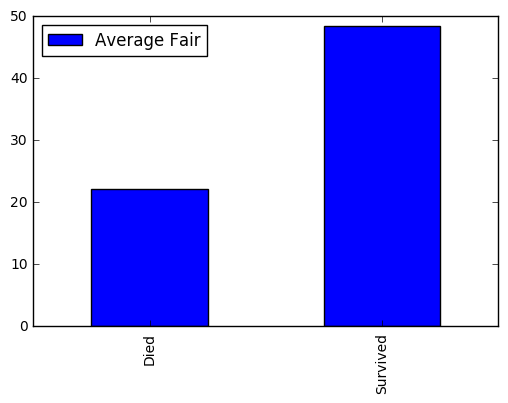

In [629]:
avg_fare.plot(kind='bar')
plt.xticks([0,1],['Died','Survived'])

In [630]:
#From the dataframe above, we can conclude that people paid with higher fare price tend to have better chances of 
#survive.

In [631]:
#Now, Let's take a look at the overall distribution of the fare price

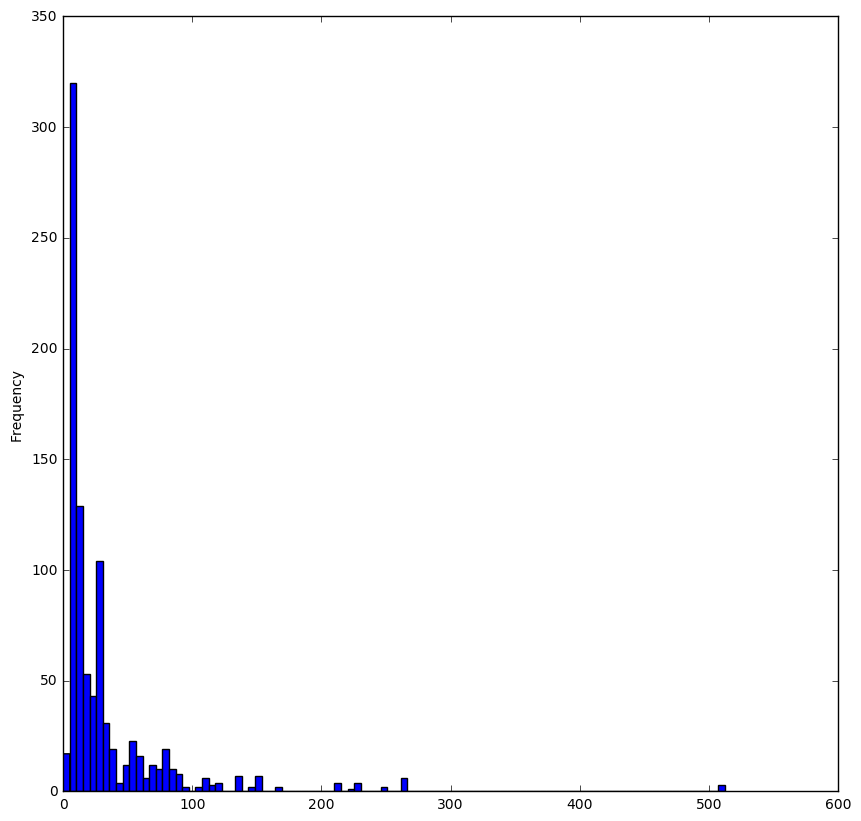

In [632]:
titanic_train['Fare'].plot.hist(bins=100,figsize=(10,10))

In [633]:
#From the histogram above, we can see that most people paid with lower amount of fare price for their ticket, except
#few paid with higher amount and the most expensive one is above $500.

In [634]:
#To see more clearly about the distribution of the most paid fare price, specify the arange for the x axis, this time,
#I choose (0,100)

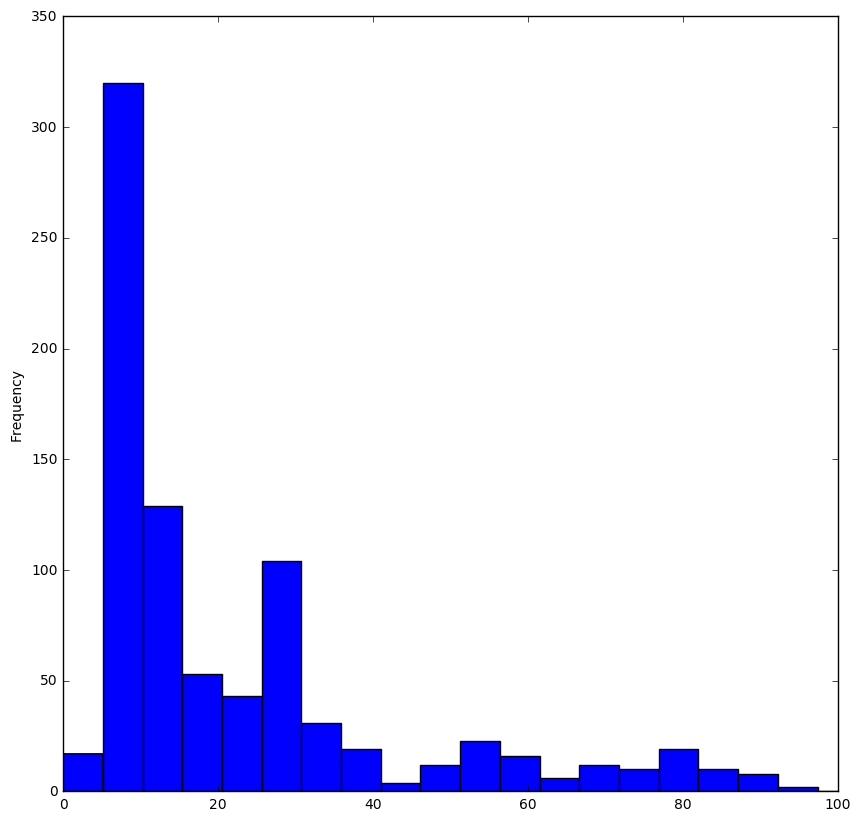

In [635]:
titanic_train['Fare'].plot.hist(bins=100,figsize=(10,10),xlim=(0,100))

In [636]:
#Now it's easier to see from the above histogram that more than 300 people only paid with less than $5

In [637]:
#Next, Let's explore the relationship between the family size and family members' survival rate

In [638]:
#First, Define the family size as the sum of 'SibSp' and 'Parch'

In [639]:
titanic_train['Family'] = titanic_train['SibSp'] + titanic_train['Parch']

In [640]:
#Find the people with the most and the least family members

In [641]:
most_family = np.where(titanic_train['Family'] == max(titanic_train['Family']))
titanic_train.iloc[most_family]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
159,160,0,Class3,"Sage, Master. Thomas Henry",male,28.0,8,2,CA. 2343,69.55,n,S,10
180,181,0,Class3,"Sage, Miss. Constance Gladys",female,28.0,8,2,CA. 2343,69.55,n,S,10
201,202,0,Class3,"Sage, Mr. Frederick",male,28.0,8,2,CA. 2343,69.55,n,S,10
324,325,0,Class3,"Sage, Mr. George John Jr",male,28.0,8,2,CA. 2343,69.55,n,S,10
792,793,0,Class3,"Sage, Miss. Stella Anna",female,28.0,8,2,CA. 2343,69.55,n,S,10
846,847,0,Class3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.55,n,S,10
863,864,0,Class3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.55,n,S,10


In [642]:
least_family = np.where(titanic_train['Family'] == min(titanic_train['Family']))
titanic_train.iloc[least_family]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
2,3,1,Class3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,n,S,0
4,5,0,Class3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,n,S,0
5,6,0,Class3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,n,Q,0
6,7,0,Class1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S,0
11,12,1,Class1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C,S,0
12,13,0,Class3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,n,S,0
14,15,0,Class3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,n,S,0
15,16,1,Class2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,n,S,0
17,18,1,Class2,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,13.0000,n,S,0
19,20,1,Class3,"Masselmani, Mrs. Fatima",female,28.0,0,0,2649,7.2250,n,C,0


In [643]:
#Unfortunately, we find out that every family member in the largest family died in this tragedy. However, it's
#hard to say that people with bigger family size tend to die in this case, since in the second plot, there are also 
#lots of people died with very small family size. 

In [644]:
#Let's narrow down the question and try to analyze the impact of 'SibSp' and 'Parch' on the corresponding survival 
#rate separately

In [645]:
#First, we can analyze the relationship between the number of 'SibSp' and the survival rate

In [646]:
SibSp_SR = DataFrame(titanic_train.groupby(['SibSp','Survived'])['PassengerId'].count())
SibSp_SR

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

In [647]:
#By dividing the total number of people in each SibSp group by the number of people who survived in that group,
#we can get the relative probability of survive for each group of 'SibSp' and we can find out that people with more 
#'SibSp' tend to have less chance to survive.

In [648]:
#Second, we analyze the relationship between the number of 'Parch' and the survival rate

In [649]:
Parch_SR = DataFrame(titanic_train.groupby(['Parch','Survived'])['PassengerId'].count())
Parch_SR

PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1

In [650]:
#We can hardly get any conclusion by aplying the same strategy as the previously one this time, there is no indication
#of any trend between the number of 'Parch' and the survival rate.

In [651]:
#Next, I want to explore the impact of Sex on the survival rate

([<matplotlib.axis.XTick at 0x131fec090>,
 <a list of 2 Text xticklabel objects>)

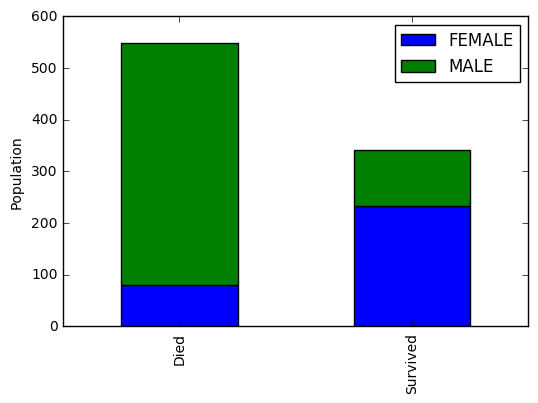

In [652]:
survived_male = titanic_train.Survived[titanic_train.Sex == 'male'].value_counts()
survived_female = titanic_train.Survived[titanic_train.Sex == 'female'].value_counts()
df = DataFrame({'MALE':survived_male, 'FEMALE':survived_female})
df.plot(kind='bar',stacked=True)
plt.ylabel('Population')
plt.xticks([0,1],['Died','Survived'])

In [653]:
#From the plot above, we can see that female has better chance to survive than male.

In [654]:
#To extend this further, Let's involve both Sex and Pclass this time to analyse their impact on the survival rate.

In [655]:
Pclass_Sex_Grouping = titanic_train.groupby(['Pclass','Sex']).mean()

In [656]:
Pclass_Sex_Grouping

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
Class1 female   469.212766  0.968085  33.978723  0.553191  0.457447   
       male     455.729508  0.368852  38.995246  0.311475  0.278689   
Class2 female   443.105263  0.921053  28.703947  0.486842  0.605263   
       male     447.962963  0.157407  30.512315  0.342593  0.222222   
Class3 female   399.729167  0.500000  23.572917  0.895833  0.798611   
       male     455.515850  0.135447  26.911873  0.498559  0.224784   

                     Fare    Family  
Pclass Sex                           
Class1 female  106.125798  1.010638  
       male     67.226127  0.590164  
Class2 female   21.970121  1.092105  
       male     19.741782  0.564815  
Class3 female   16.118810  1.694444  
       male     12.661633  0.723343

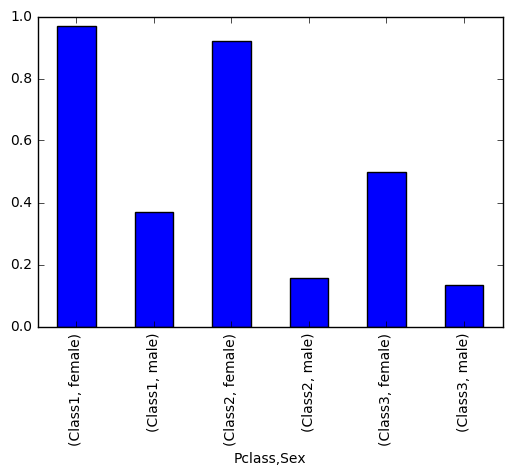

In [657]:
Pclass_Sex_Grouping['Survived'].plot.bar()

In [658]:
#From the plot above, we can conclude that, within the same class, female have a better chance to survive than male;
#For the same sex category, people in the higher class tend to have better chance to survive compared to lower class.